Day 4: Pandas



In [1]:
import pandas as pd
VECSPSB = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [2]:
VECSPSB.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [3]:
VECSPSB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              


Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?


In [4]:
VECSPSB["NTA"].nunique()

79

In [5]:
from statistics import mean

NTA_df = VECSPSB.groupby('NTA')\
         .agg(Av_Save=('Total Savings','mean'), Total_Jobs=('Job created','sum'))\
         .reset_index()

In [6]:
NTA_Sorted = NTA_df.sort_values(by=['Total_Jobs'], ascending=False)

In [7]:
Final_NTA_df = NTA_Sorted.head(5)

In [8]:
Final_NTA_df

,NTA,Av_Save,Total_Jobs
69,Steinway,11227.155714,20.0
23,East New York,48433.093333,15.0
37,Hunts Point,39246.016154,12.0
42,Maspeth,6658.283333,10.0
74,Whitestone,62038.306667,10.0



Scatter plot of jobs created versus average savings. 
Use both a standard and a logarithmic scale for the average savings.


In [12]:
NTA_Plot = NTA_Sorted.head(8)

In [14]:
NTA_Plot

,NTA,Av_Save,Total_Jobs
69,Steinway,11227.155714,20.0
23,East New York,48433.093333,15.0
37,Hunts Point,39246.016154,12.0
42,Maspeth,6658.283333,10.0
74,Whitestone,62038.306667,10.0
46,Mott Haven-Port Morris,17843.937857,10.0
9,Bushwick South,26140.455000,10.0
17,College Point,17159.372857,2.0


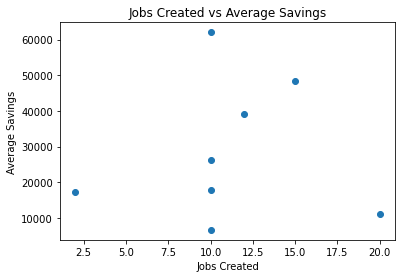

In [16]:
import matplotlib.pyplot as plt
plt.scatter(NTA_Plot["Total_Jobs"], NTA_Plot["Av_Save"])
plt.title("Jobs Created vs Average Savings")
plt.xlabel("Jobs Created")
plt.ylabel("Average Savings")
plt.show()

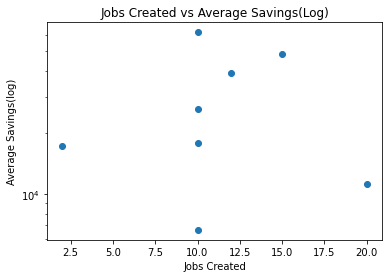

In [17]:
import matplotlib.pyplot as plt
plt.scatter(NTA_Plot["Total_Jobs"], NTA_Plot["Av_Save"])
plt.title("Jobs Created vs Average Savings(Log)")
plt.xlabel("Jobs Created")
plt.ylabel("Average Savings(log)")
plt.yscale("log")
plt.show()


Histogram of the log of the average total savings.


(array([40., 31.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  1.]),
 array([-35782.46666667,  14784.85966667,  65352.186     , 115919.51233333,
        166486.83866667, 217054.165     , 267621.49133333, 318188.81766667,
        368756.144     , 419323.47033333, 469890.79666667]),
 <BarContainer object of 10 artists>)

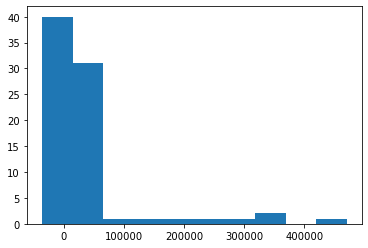

In [33]:
plt.hist(NTA_Sorted["Av_Save"], bins=10)

(array([40., 31.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  1.]),
 array([-35782.46666667,  14784.85966667,  65352.186     , 115919.51233333,
        166486.83866667, 217054.165     , 267621.49133333, 318188.81766667,
        368756.144     , 419323.47033333, 469890.79666667]),
 <BarContainer object of 10 artists>)

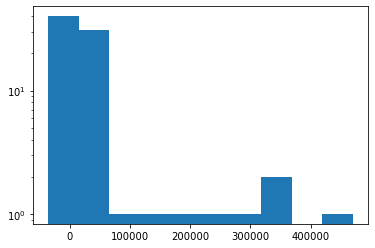

In [34]:
plt.hist(NTA_Sorted["Av_Save"], bins=10, log=True)